In [18]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

import numpy as np

print(tf.__version__)

2.12.0


In [23]:
# 데이터 생성

# train data
# t_data = 2*x1 -3*x2 + 2*x3

x_data = np.array([ [1, 2, 0], [5, 4, 3], [1, 2, -1], [3, 1, 0], [2, 4, 2],
                    [4, 1, 2], [-1, 3, 2], [4, 3, 3], [0, 2, 6], [2, 2, 1],
                    [1, -2, -2], [0, 1, 3], [1, 1, 3], [0, 1, 4], [2, 3, 3] ])

t_data = np.array([-4, 4, -6, 3, -4,
                   9, -7, 5, 6, 0,
                   4, 3, 5, 5, 1])

print('x_data.shape =', x_data.shape, ', t_data.shape =', t_data.shape)

x_data.shape = (15, 3) , t_data.shape = (15,)


In [24]:
# 모델 구축
# Linear Regression 을 keras 이용하여 생성

model = Sequential()
model.add(Dense(1, input_shape=(3, ),activation='linear'))  # 노드 3개인 출력층 생성

In [25]:
# 모델 컴파일
# 학습을 위한 optimizer, 손실함수 loss 정의

model.compile(optimizer=SGD(learning_rate=1e-2), loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [28]:
# 모델 학습
hist = model.fit(x_data, t_data, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.9588e-11
Epoch 2/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.9588e-11
Epoch 3/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.9609e-11
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.9609e-11
Epoch 5/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.9610e-11
Epoch 6/1000
1/1 [==============================] - 0s 11ms/step - loss: 1.9610e-11
Epoch 7/1000
1/1 [==============================] - 0s 8ms/step - loss: 1.9610e-11
Epoch 8/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.9610e-11
Epoch 9/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.9610e-11
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 1.9632e-11
Epoch 11/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.9632e-11
Epoch 12/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.9632e-11

In [29]:
# 모델 평가 및 예측
test_data = [ [5,5,0], [2,3,-1], [-1,0,-1], [10,5,2], [4,-1,-2] ]

ret_val = [ 2*data[0] - 3*data[1] + 2*data[2] for data in test_data ]

print(ret_val)

prediction_val = model.predict(np.array(test_data))

print(prediction_val)
print('========================')
print(ret_val)

[-5, -7, -4, 9, 7]
1/1 [==============================] - 0s 35ms/step
[[-5.000008 ]
 [-7.0000033]
 [-3.9999943]
 [ 8.9999895]
 [ 7.000006 ]]
[-5, -7, -4, 9, 7]


In [30]:
print(model.input) # 모델 입력
print(model.output) # 모델 출력
print(model.weights) # 모델 가중치

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name='dense_2_input'), name='dense_2_input', description="created by layer 'dense_2_input'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='dense_2/BiasAdd:0', description="created by layer 'dense_2'")
[<tf.Variable 'dense_2/kernel:0' shape=(3, 1) dtype=float32, numpy=
array([[ 1.9999996],
       [-3.0000024],
       [ 2.       ]], dtype=float32)>, <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32, numpy=array([5.154223e-06], dtype=float32)>]


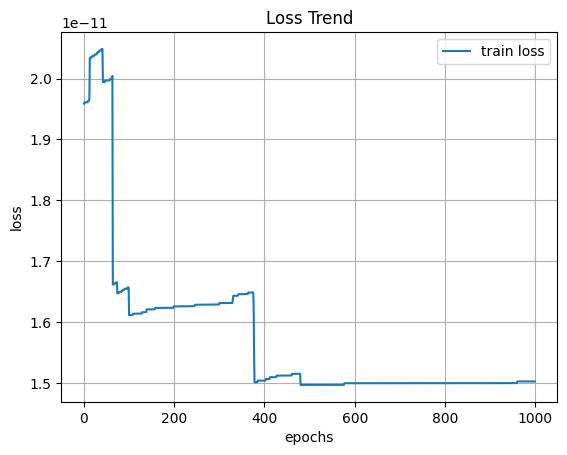

In [31]:
# 모델 손실함수 추세
import matplotlib.pyplot as plt

plt.title('Loss Trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.legend(loc='best')

plt.show()